In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets.mnist import load_data
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from keras.utils import to_categorical

In [2]:
# Lets read in the data
(train_images,train_labels), (test_images, test_labels) = load_data()

print(f'Train images: {train_images.shape}')
print(f'Train labels: {train_labels.shape}')
print(f'Test images: {test_images.shape}')
print(f'Test labels: {test_labels.shape}')

Train images: (60000, 28, 28)
Train labels: (60000,)
Test images: (10000, 28, 28)
Test labels: (10000,)


In [7]:
# Scaling and reshaping the images
train_images = train_images.reshape((60000,28,28,1)).astype('float32') / 255
test_images = test_images.reshape((10000,28,28,1)).astype('float32') / 255

In [10]:
# One hot encoding the labels
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [16]:
# Lets built our CNN model 

model = Sequential()
model.add(Conv2D(32, (3,3) , activation='relu', input_shape= (28,28, 1)) )
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3) , activation='relu') )
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3) , activation='relu' ) )
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))


In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

In [21]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels,batch_size=64,epochs=5,validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 44s 51ms/step - loss: 0.1863 - accuracy: 0.9434 - val_loss: 0.0557 - val_accuracy: 0.9845
Epoch 2/5
844/844 [==============================] - 42s 50ms/step - loss: 0.0495 - accuracy: 0.9847 - val_loss: 0.0433 - val_accuracy: 0.9872
Epoch 3/5
844/844 [==============================] - 43s 51ms/step - loss: 0.0351 - accuracy: 0.9892 - val_loss: 0.0575 - val_accuracy: 0.9840
Epoch 4/5
844/844 [==============================] - 44s 52ms/step - loss: 0.0275 - accuracy: 0.9910 - val_loss: 0.0378 - val_accuracy: 0.9892
Epoch 5/5
844/844 [==============================] - 44s 52ms/step - loss: 0.0211 - accuracy: 0.9934 - val_loss: 0.0383 - val_accuracy: 0.9895


In [22]:
# Lets see how well our model perform on the test data
model.evaluate(test_images,test_labels)

313/313 [==============================] - 2s 8ms/step - loss: 0.0333 - accuracy: 0.9899


[0.03334137797355652, 0.9898999929428101]

In [23]:
# Lets see how well our model perform on the training data
model.evaluate(train_images,train_labels,batch_size=64)

938/938 [==============================] - 13s 14ms/step - loss: 0.0190 - accuracy: 0.9937


[0.018990276381373405, 0.9937166571617126]

1/1 [==============================] - 0s 28ms/step


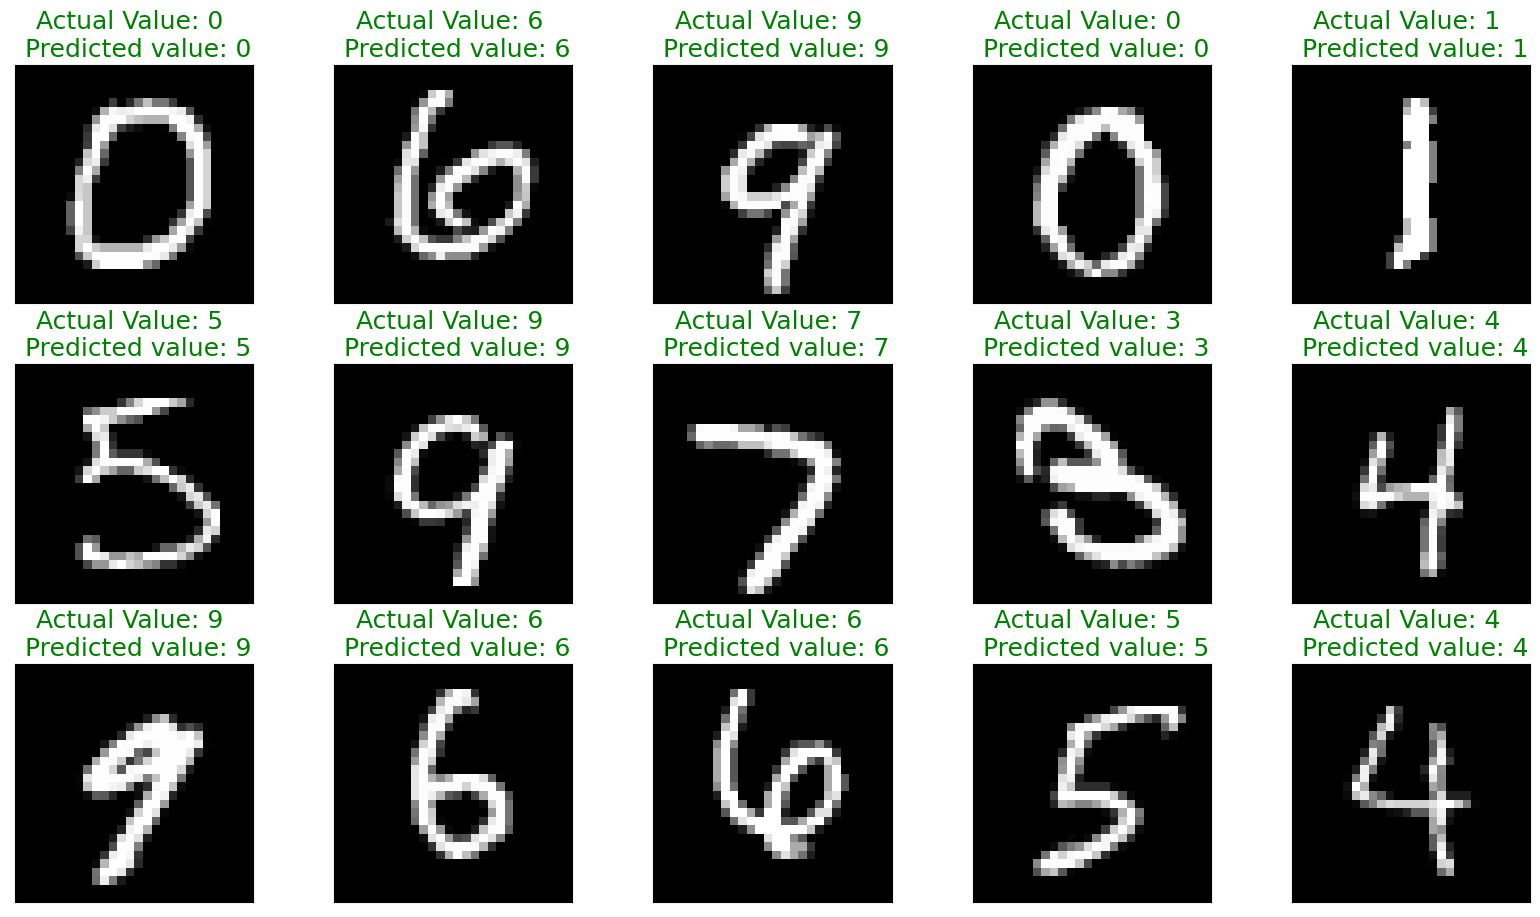

In [61]:
#Lets visualize some of hand written digits and so the predictions of our model
fig, axes = plt.subplots(3,5,figsize=(16,9))
# plt.axis('off')
for i, ax in enumerate(axes.flat):
    predicted_label= np.argmax(model.predict(np.expand_dims(test_images[i + 10],axis=0)))
#     predicted_value = np.argmax(predicted)
    ax.set_title(f'Actual Value: {np.argmax(test_labels[i + 10])} \n Predicted value: {predicted_label}',color='green',size=18)
    
    ax.imshow(test_images[i + 10],cmap=plt.cm.gray)
    ax.set(xticks=[],yticks=[])
    

plt.tight_layout(pad=0.1,w_pad=0.3)
plt.show()

In [62]:
# Saving the model
model.save('Digitclassifier.keras')